# Macroscopic Fundamental Diagrams
## CEE 498- Transportation Economics

Noah Garfinkle

In [11]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import ortools as ort
from shapely.geometry import Point, LineString
import shapely.geometry as geom

Step 1. Create a conceptual model of the road network

In [7]:
intersections = [Point(0,0),Point(3,0),Point(6,0),Point(0,3),Point(3,3),Point(6,3),Point(0,6),Point(3,6),Point(6,6)]

In [8]:
df_intersections = gpd.GeoDataFrame({"geometry":intersections})

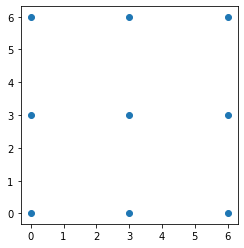

In [9]:
df_intersections.plot()

In [21]:
roads = []
for i in range(0,len(intersections)):
    for j in range(0,len(intersections)):
        if i < j:
            road = LineString([intersections[i],intersections[j]])
            roads.append(road)
df_roads = gpd.GeoDataFrame({"geometry":roads})

In [22]:
df_roads = df_roads[df_roads.geometry.length == 3]

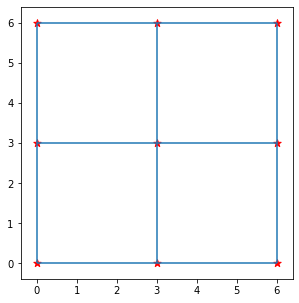

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
df_roads.plot(ax=ax)
df_intersections.plot(ax=ax,marker="*",color='red',markersize=60)

In [ ]:
def generateGrid(nRows=3,nCols=3,rowSpacing=3,colSpacing=3):
    return 0